**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024

## Uranium Mill Network Dynamics Simulation

### Stand-Alone Solvent Extraction Module

---
## Table of Contents<a id="toc"></a>
* [White Mesa Setup](#wm_setup)
* [Initialize Run](#run)
* [Data Recovery](#data)
* [Steady-State](#ss)
* [Conclusion](#conc)
---

## [White Mesa Setup](#toc)<a id="wm_setup"></a>

In [1]:
"""Setup a White Mesa plant"""

from cortix import Cortix
from cortix import Network
from cortix import Units as unit
white_mesa = Cortix(use_mpi=False, splash=True)   # system top level, establish system
wm_net = white_mesa.network = Network()           # creating system network

# help(white_mesa.network)

[26376] 2024-12-18 18:11:29,908 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

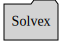

In [2]:
"""Setup Solvent Extraction"""
from src.solvex import Solvex
solvex = Solvex()
wm_net.module(solvex)
wm_net.draw(engine='circo', node_shape='folder', ports=True)

Documentation options:
 + Live in this notebook run on *code* cell: `help(src.solvex)`
 + On the web: [source](https://github.com/dpploy/engy-4390/blob/main/projects/2024/u-mill/src/solvex.py)

## [Initialize Run](#toc)<a id="run"></a>

In [3]:
'''Initialize run'''
end_time = 15.0*unit.day
time_step = 60.0*unit.minute
show_time = (True, unit.day)

solvex.end_time = end_time
solvex.time_step = time_step
solvex.show_time = show_time

In [4]:
white_mesa.run()
white_mesa.close()

[26376] 2024-12-18 18:11:30,203 - cortix - INFO - Launching Module <src.solvex.Solvex object at 0x000001E76D3AAB90>
[26376] 2024-12-18 18:11:34,579 - cortix - INFO - run()::Elapsed wall clock time [s]: 4.67
[26376] 2024-12-18 18:11:34,580 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      8

## [Data Recovery](#toc)<a id="data"></a>

In [5]:
"""Recover modules data"""
solvex = wm_net.modules[0]

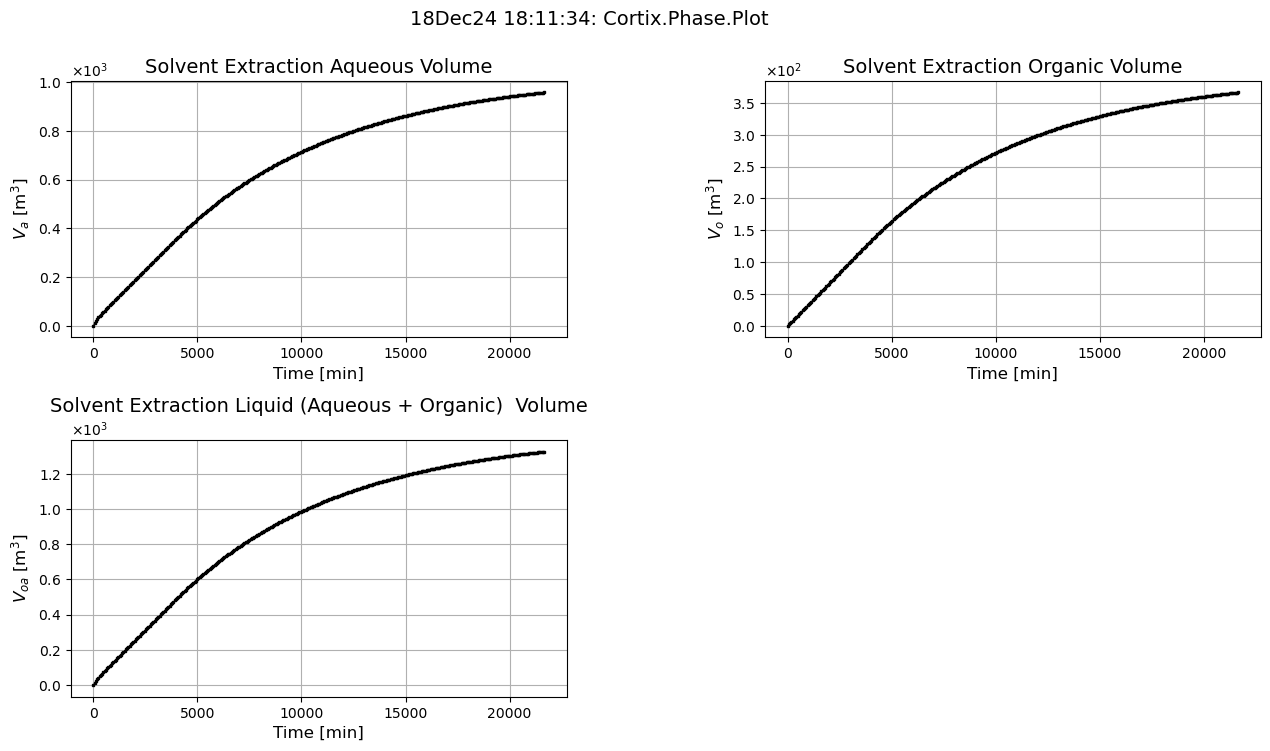

In [6]:
"""Solvent Extraction Data"""
solvex.extract_state_phase.plot(['aqueous-volume', 'organic-volume', 'liquid-volume'], show=True,figsize=[14,8])

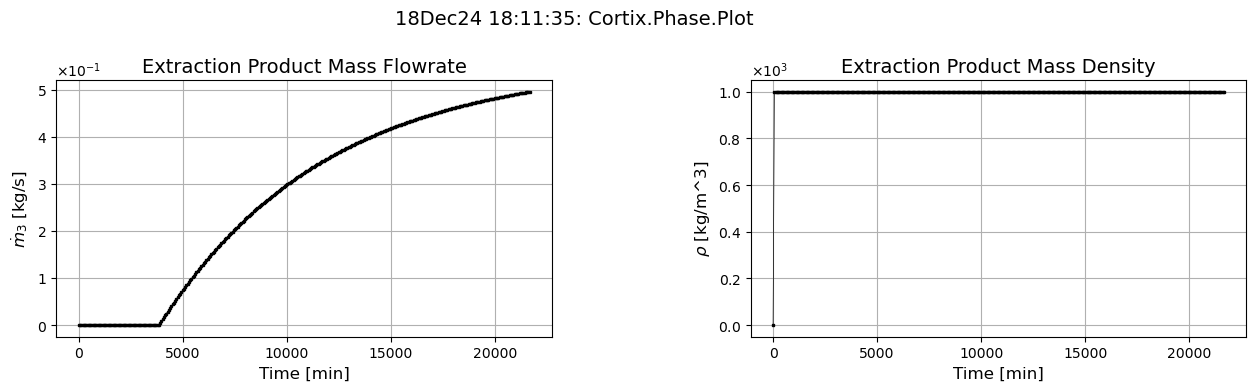

In [7]:
solvex.extract_product_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])

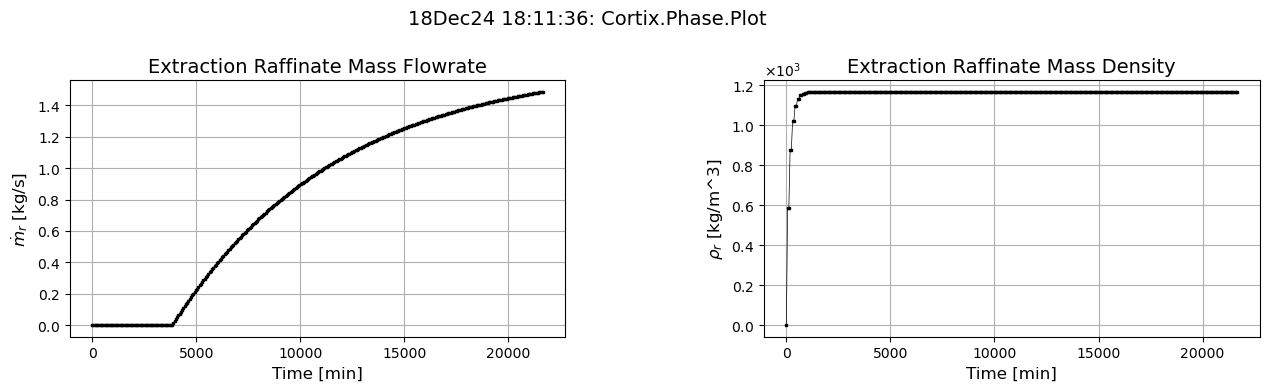

In [8]:
solvex.extract_raffinate_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])

## [Steady-State](#toc)<a id="ss"></a>

Finding conditions when the volume and flowrate rate of changes are zero. 

In [9]:
end_time += 15*unit.day

solvex.initial_time = solvex.end_time
solvex.end_time = end_time

In [10]:
'''Run system in parallel'''
white_mesa.run()
white_mesa.close() # Shutdown Cortix

[26376] 2024-12-18 18:11:37,241 - cortix - INFO - Launching Module <src.solvex.Solvex object at 0x000001E76DD53850>
[26376] 2024-12-18 18:11:41,619 - cortix - INFO - run()::Elapsed wall clock time [s]: 11.71
[26376] 2024-12-18 18:11:41,620 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      

In [11]:
'''Recovery S.S. Data'''
solvex = wm_net.modules[0]

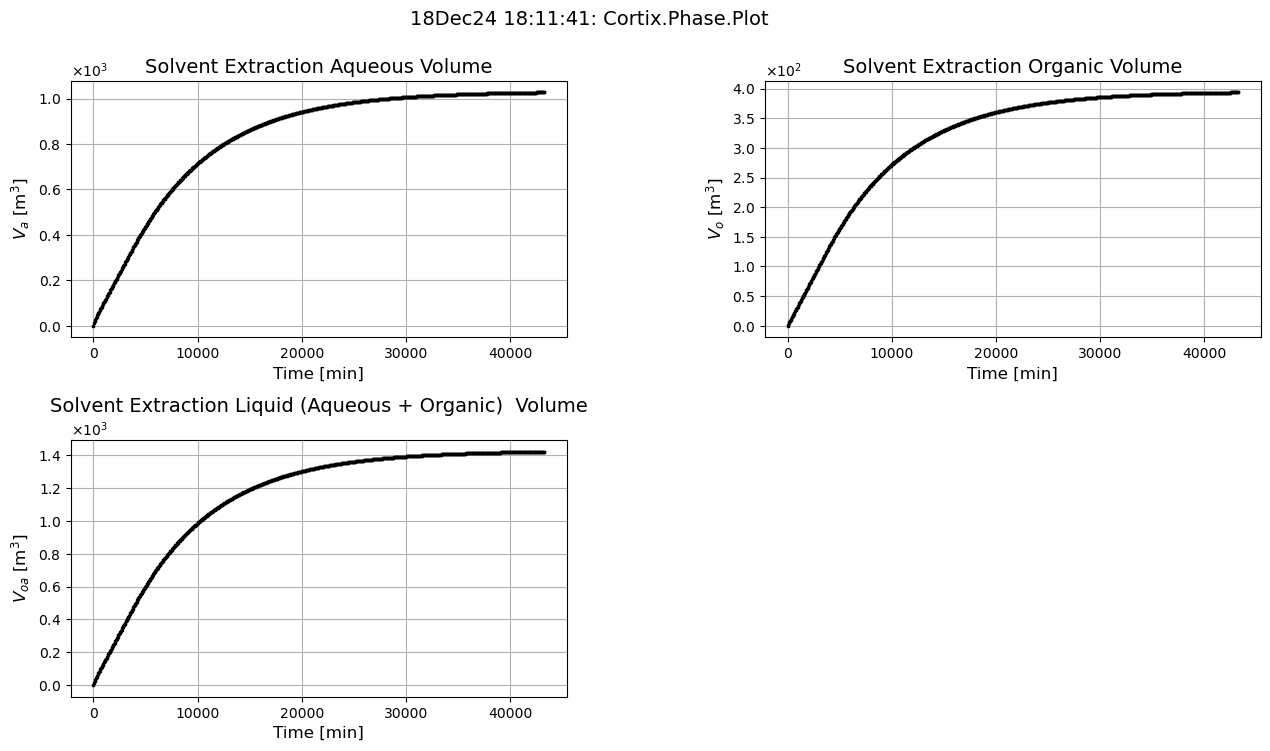

In [12]:
"""Solvent Extraction Data"""
solvex.extract_state_phase.plot(['aqueous-volume', 'organic-volume', 'liquid-volume'], show=True,figsize=[14,8])

## [Conclusion](#toc)<a id="conc"></a>

The steady-state values of the extraction tank's aqeuous volume, organic volume, and total liquid volume are shown in the table below. 

| **Aqueous Volume** |**Organic Volume**  |**Total Liquid Volume**     |
|:-------------------|:-------------------|:-------------------|
|1.0 x 10<sup>3</sup> [m<sup>3</sup>] |4.0 x 10<sup>2</sup>  [m<sup>3</sup>] |1.4 x 10<sup>3</sup> [m<sup>3</sup>] |         |            |